In [169]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import log
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline


In [168]:
datasets.load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
boston_dataset=load_boston()

In [18]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [17]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Data Exploration

In [20]:
data=pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
data['PRICE']=boston_dataset.target

In [22]:
## Check is null

data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


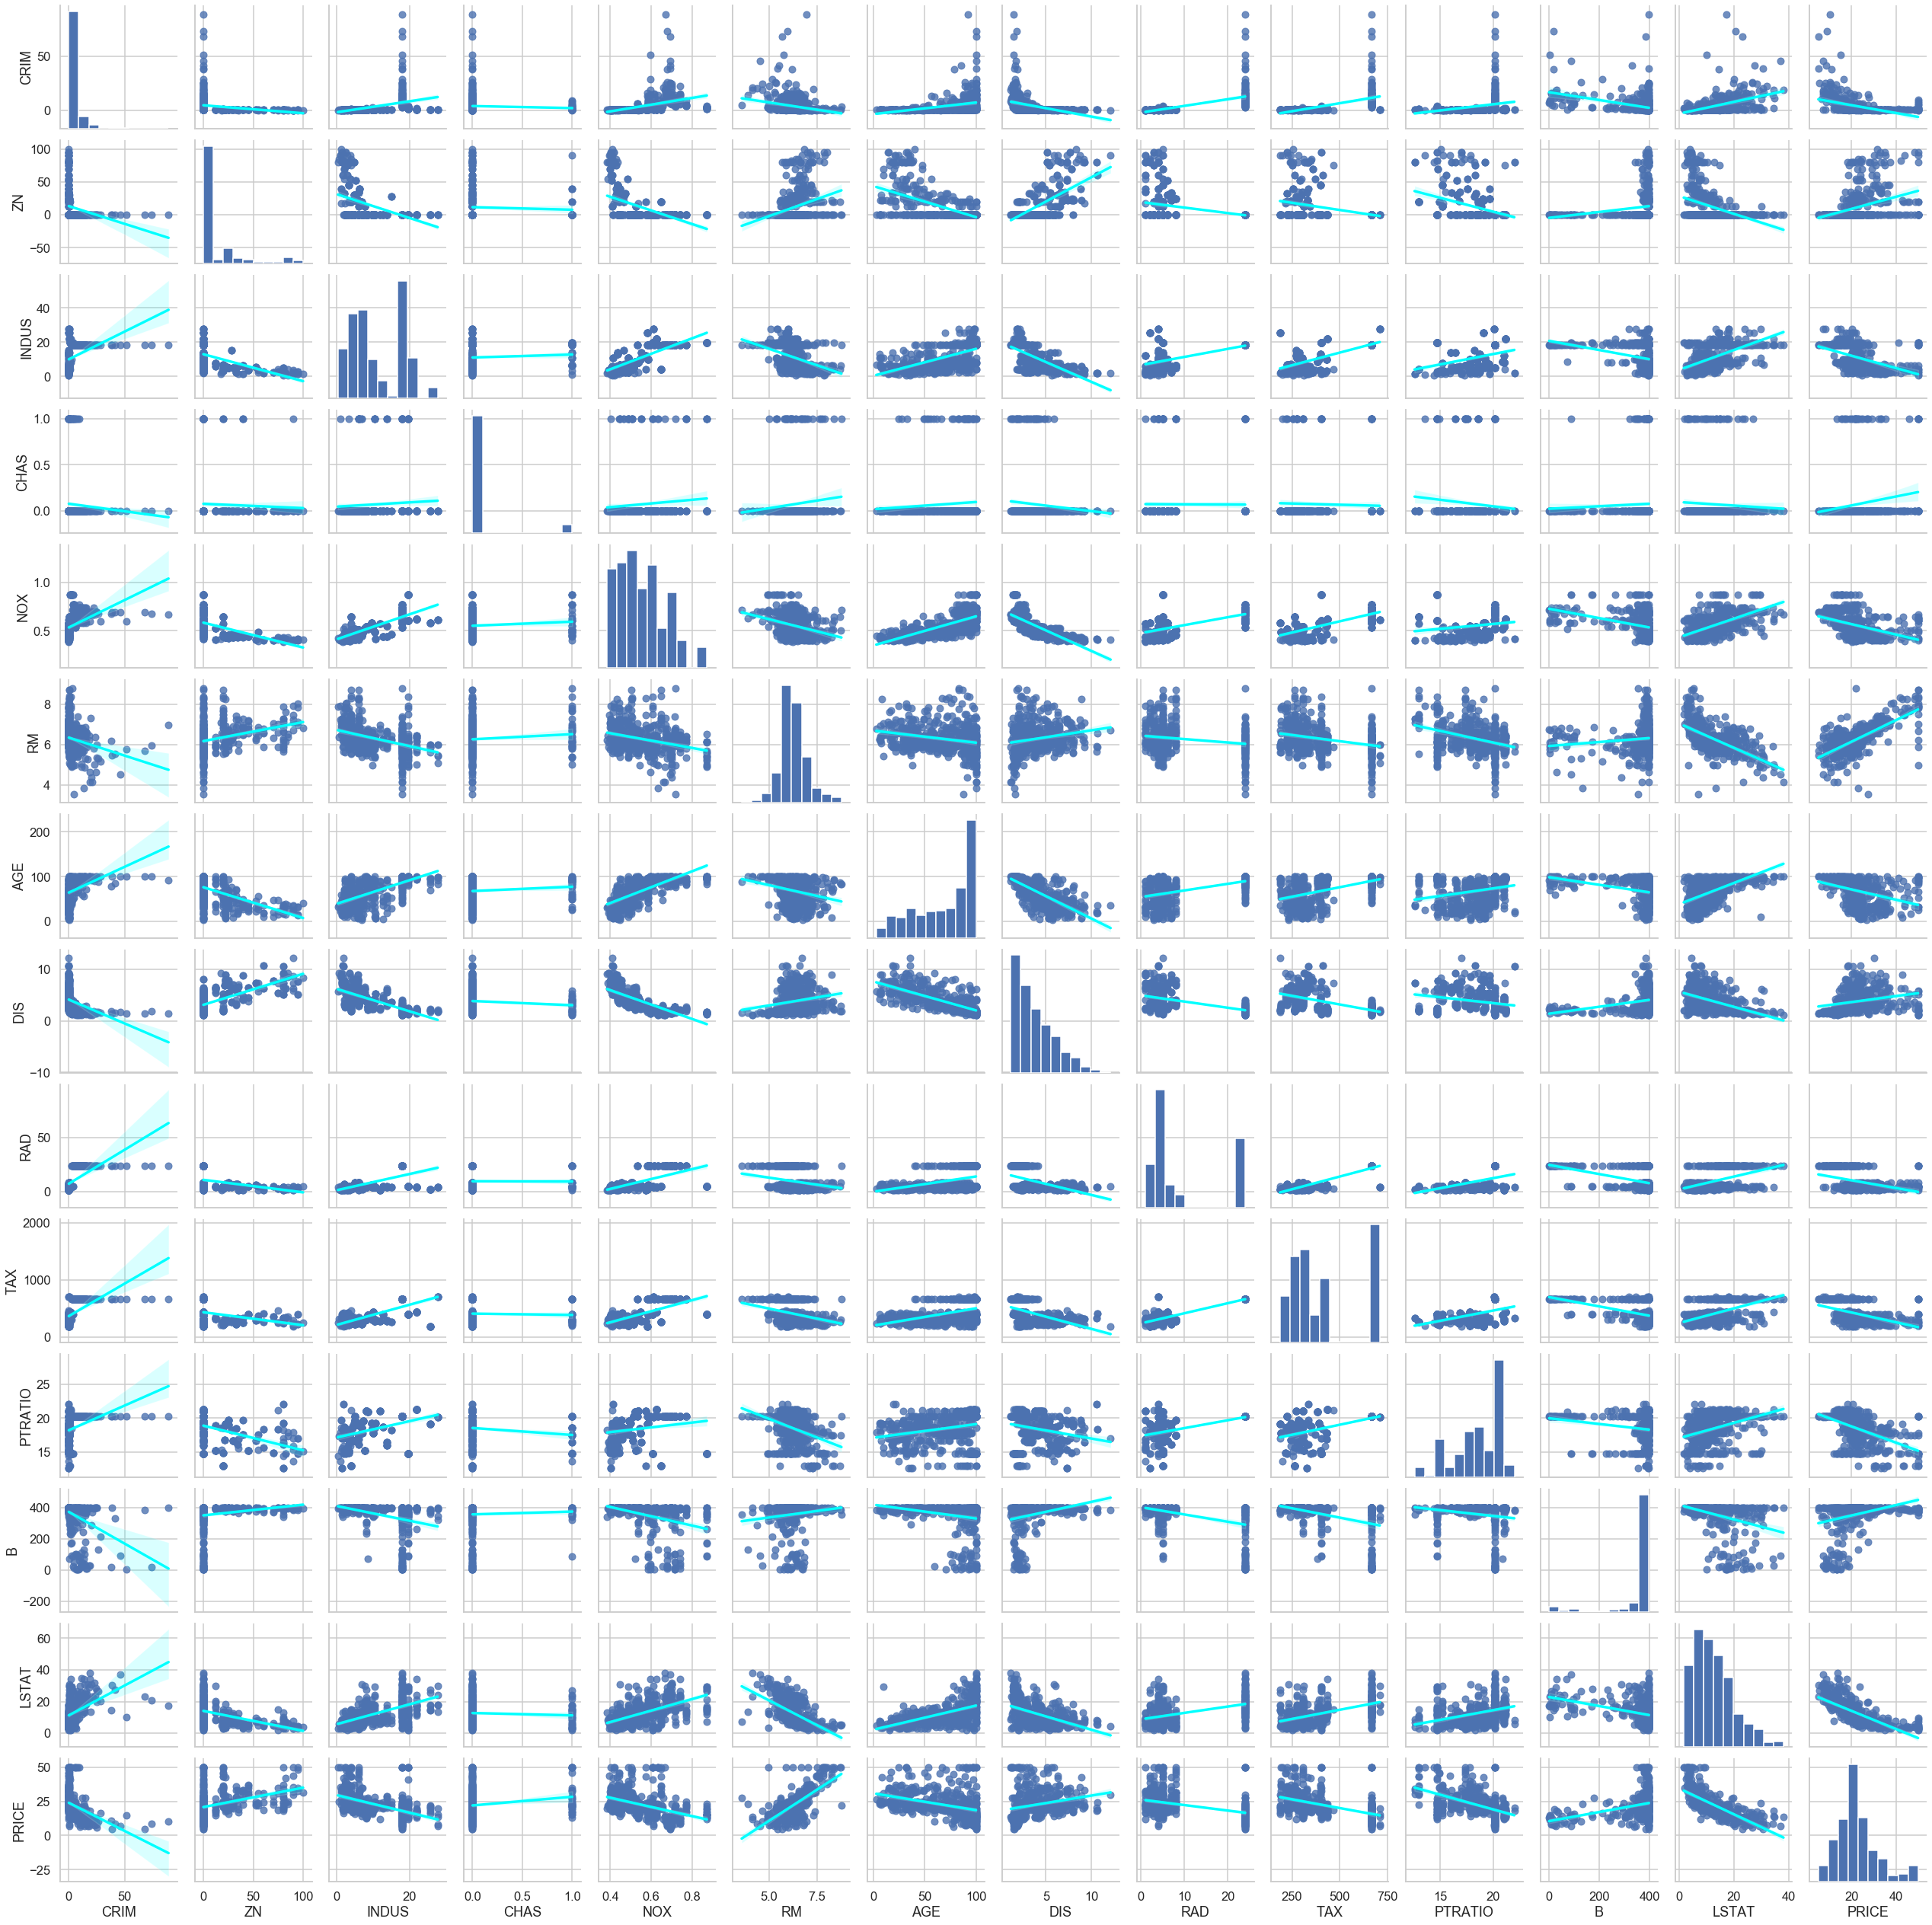

Wall time: 1min 45s


In [119]:
%%time

sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

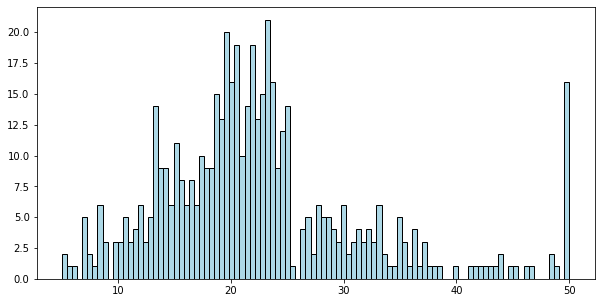

In [38]:
plt.figure(figsize=[10,5])
plt.hist(data['PRICE'],bins=100, ec='black',color='lightblue')
plt.show()

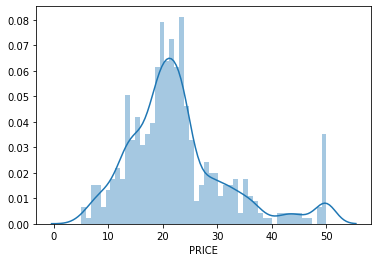

In [41]:
sns.distplot(data['PRICE'],bins=50)
plt.show()

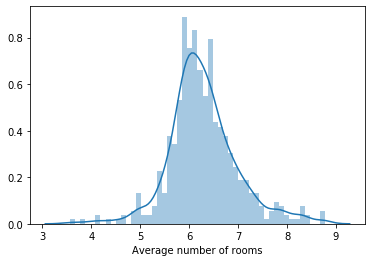

In [44]:
sns.distplot(data['RM'],bins=50)
plt.xlabel("Average number of rooms")
plt.show()


In [45]:
data['RM'].mean()

6.284634387351787

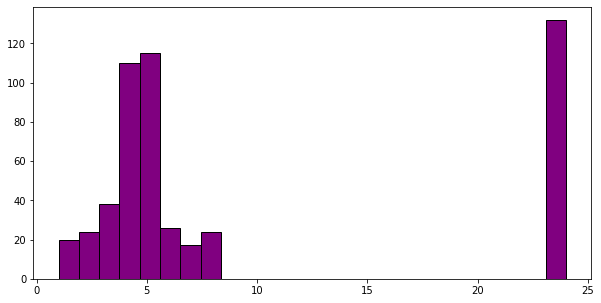

In [59]:
plt.figure(figsize=[10,5])
plt.hist(data['RAD'],bins=25, ec='black',color='purple')
plt.show()

In [60]:
frequency=data['RAD'].value_counts()

<BarContainer object of 9 artists>

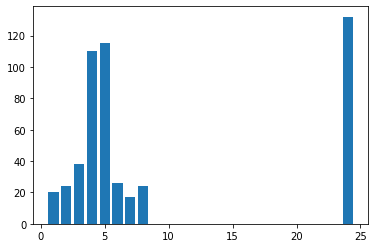

In [68]:
plt.bar(frequency.index,frequency.values)

In [69]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [70]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [81]:
mask=np.zeros_like(data.corr())
triange_indices=np.triu_indices_from(mask)
mask[triange_indices]=True

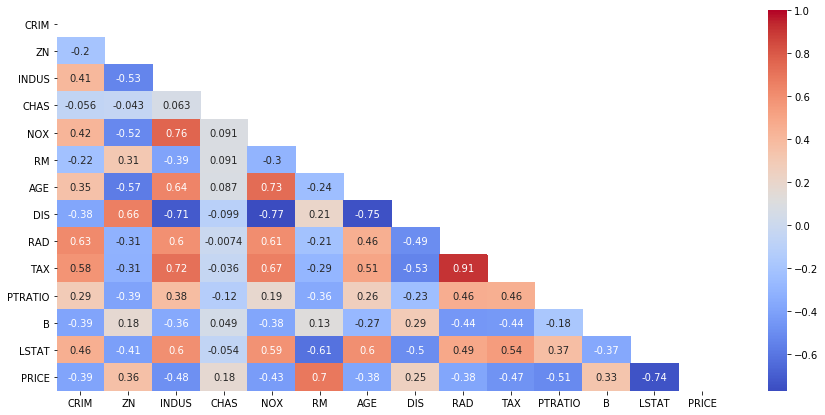

In [97]:
plt.figure(figsize=[15,7])
sns.heatmap(data.corr(method="pearson"),mask=mask,annot=True,cmap="coolwarm")

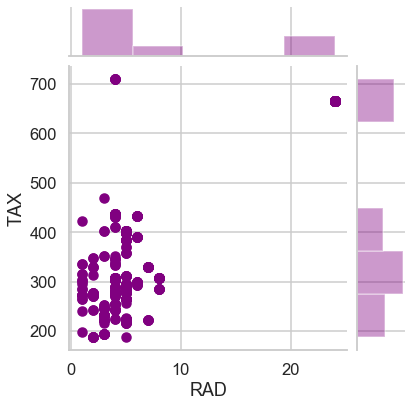

In [107]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(data["RAD"],data["TAX"],color="purple")
plt.show()

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


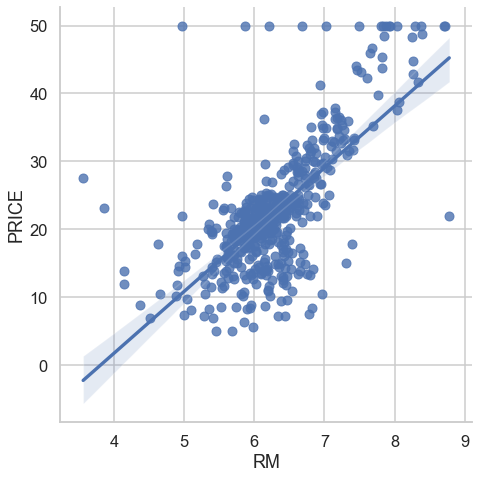

In [114]:
sns.lmplot("RM","PRICE",data=data,size=7)

Wall time: 17 ms


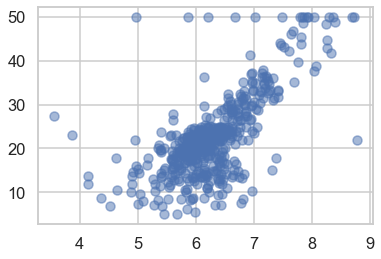

In [118]:
%%time
plt.scatter(data["RM"],data["PRICE"],alpha=0.5)

In [120]:
prices=data["PRICE"]
features=data.drop("PRICE",axis=1)

In [124]:
X_train,X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)

In [126]:
regr=LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
regr.intercept_

36.53305138282439

In [131]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coef"])

,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [127]:
regr.predict(X_test)

array([31.0789639 , 31.721694  , 30.87314928, 22.28234976, 18.85606115,
       16.47132499, 36.05004157, 14.64032337, 25.24078574, 36.92073901,
       21.24395893, 31.05887245, 27.83837442, 33.90940352, 33.94484713,
       40.02040311, 24.14373978, 23.32713796, 25.34120561, 21.49039367,
       32.84083784, 17.72022746, 25.36791791, 24.95097385, 32.39265827,
       20.42497001, 19.33257493, 16.97042135, 38.61885431,  0.99817403,
       32.18145419, 32.02985417, 26.01208772, 23.68917386, 20.38030786,
       19.45806916,  3.46147073, 34.9034939 , 26.98281534, 27.54218642,
       33.89021463, 29.7542196 , 18.15540973, 31.44609872, 17.82446519,
       28.30204573, 19.31527567, 21.90113613, 37.88043957, 16.3464837 ,
       24.68739442, 19.29872222, 24.46627252, 33.91063878, 26.63876989,
       34.33425076, 20.88039511, 19.69421544, 18.70556587, 24.73298651,
       19.89555718, 23.36114411, 39.77392395, 42.09981475, 30.12796703,
       16.7250859 , 23.89207337,  3.48737625, 31.5042913 , 28.36

In [133]:
regr.score(X_train,y_train)

0.750121534530608

In [136]:
regr.score(X_test,regr.predict(X_test))

1.0

In [158]:
regr.score(X_test,y_test)

0.6709339839115628

## Data Transformations

In [139]:
data["PRICE"].skew()

1.1080984082549072

In [142]:
y_log=np.log(data["PRICE"])

In [143]:
y_log.skew()

-0.33032129530987864

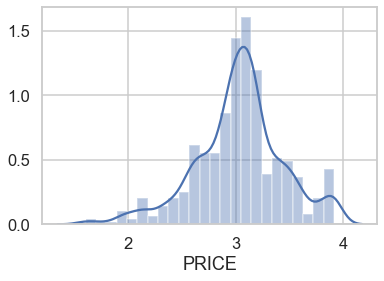

In [145]:
sns.distplot(y_log)

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


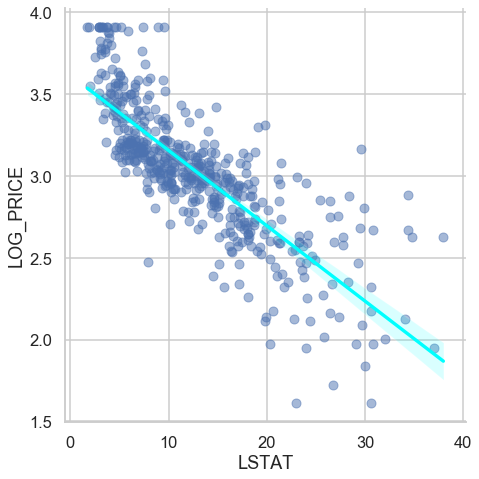

In [154]:
transformed_data=features
transformed_data["LOG_PRICE"]=y_log
sns.lmplot(x="LSTAT",y="LOG_PRICE",data=transformed_data,size=7,scatter_kws={'alpha':0.5},line_kws={'color' : "cyan"})

## Regression with log prices

In [159]:
prices=np.log(data["PRICE"])
features=data.drop("PRICE",axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)

regr=LinearRegression()
regr.fit(X_train,y_train)

print("R squared train",regr.score(X_train,y_train))

print("R squared test",regr.score(X_test,y_test))

R squared train 0.7930234826697583
R squared test 0.7446922306260724


## p values and evaluating Coefficients

In [167]:
X_incl_const=sm.add_constant(X_train)
model=sm.OLS(y_train,X_incl_const)
results=model.fit()

#results.patrams

pd.DataFrame({'coef':results.params,'p-value':round(results.pvalues,3)})

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


#### P-value with >0.05 are cosndiered insignificant.

## Variance Inflation Factor

$$ TAX= \alpha_0 + \alpha_1 CRIM + \alpha_2 ZN +..... \alpha_12 LSTAT $$


 $$ VIF _{TAX}= \frac{1}{1-R^2_{TAX}} $$

In [173]:
variance_inflation_factor(X_incl_const.values,1)


1.7145250443932485

In [181]:
len(X_incl_const.columns)
X_incl_const.shape[1]

14

In [184]:
j=[variance_inflation_factor(X_incl_const.values,i) for i in range(X_incl_const.shape[1])]

In [189]:
pd.DataFrame({'coef':X_incl_const.columns,'vif': np.round(j,2)})

,coef,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


###### If VIF is > 10 then it should be problematic. In our case this is good.

## Model Simplification

In [204]:
X_incl_const=sm.add_constant(X_train)
model=sm.OLS(y_train,X_incl_const)
results=model.fit()
results.summary()
#results.patrams
print("BIC",results.bic)
print("R2",results.rsquared)
org_coef=pd.DataFrame({'coef':results.params,'p-value':round(results.pvalues,3)})

BIC -139.74997769478875
R2 0.7930234826697582


In [205]:
X_incl_const=sm.add_constant(X_train).drop(["INDUS"],axis=1)
model=sm.OLS(y_train,X_incl_const)
results=model.fit()
results.summary()
#results.patrams
print("BIC",results.bic)
print("R2",results.rsquared)
indus_minus_coef=pd.DataFrame({'indus_minus_coef':results.params,'p-value':round(results.pvalues,3)})

BIC -145.14508855591163
R2 0.7927126289415163


In [206]:
X_incl_const=sm.add_constant(X_train).drop(["INDUS","AGE"],axis=1)
model=sm.OLS(y_train,X_incl_const)
results=model.fit()
results.summary()
#results.patrams
print("BIC",results.bic)
print("R2",results.rsquared)
reduced_minus_coef=pd.DataFrame({'reduced_coef':results.params,'p-value':round(results.pvalues,3)})

BIC -149.49934294224656
R2 0.7918657661852815


In [207]:
frames=[org_coef,indus_minus_coef,reduced_minus_coef]
pd.concat(frames,axis=1)

,coef,p-value,indus_minus_coef,p-value,reduced_coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residual and Residual Plots

In [270]:
prices=np.log(data["PRICE"])
features=data.drop(["PRICE","INDUS","AGE"],axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)

X_incl_const=sm.add_constant(X_train)
model=sm.OLS(y_train,X_incl_const)
results=model.fit()
results.resid

50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64

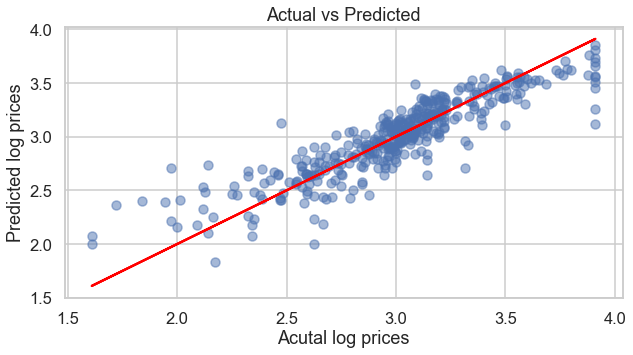

In [271]:
plt.figure(figsize=[10,5])
corr=round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train,y=results.fittedvalues,alpha=0.5)
plt.plot(y_train,y_train, color="red")
plt.xlabel("Acutal log prices")
plt.ylabel("Predicted log prices")
plt.title("Actual vs Predicted")

reduce_log_mse=round(results.mse_resid,3)
reduce_log_rsquared=round(results.rsquared,3)

Text(0.5, 1.0, 'Predicted Values vs Error')

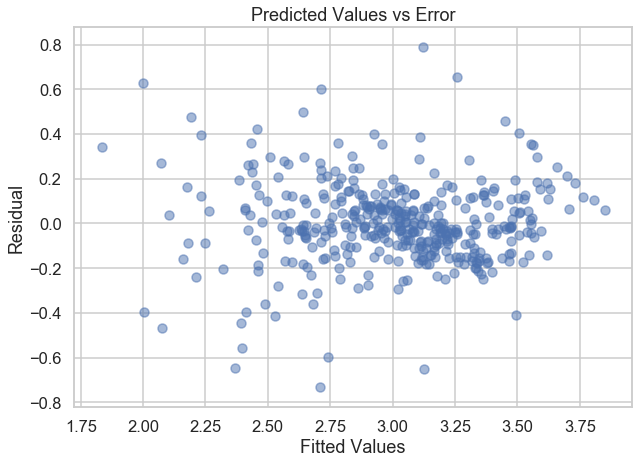

In [272]:
plt.figure(figsize=[10,7])
corr=round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=results.fittedvalues,y=results.resid,alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Predicted Values vs Error")

Text(0.5, 1.0, 'Mean is -0.0 and skew is 0.118')

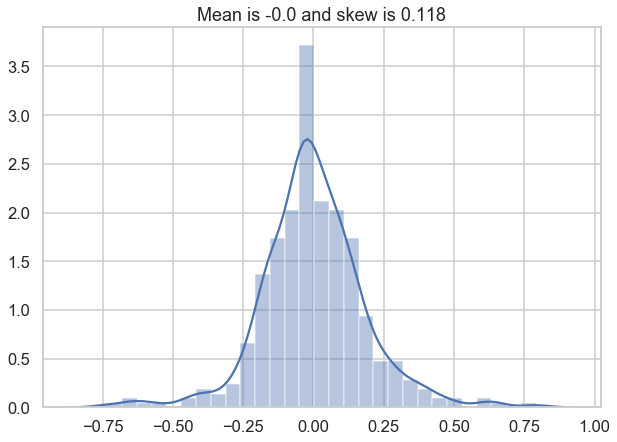

In [273]:
# Checking Normality
mean=round(results.resid.mean(),3)
skew=round(results.resid.skew(),3)
plt.figure(figsize=[10,7])
sns.distplot(results.resid)
plt.title(f"Mean is {mean} and skew is {skew}")

In [274]:
# Removing Log and including all features
prices=data["PRICE"]
features=data.drop(["PRICE"],axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)

X_incl_const=sm.add_constant(X_train)
model=sm.OLS(y_train,X_incl_const)
results=model.fit()
results.resid

50     -1.329586
367    10.881555
34     -0.247853
78      0.464848
172    -0.312624
         ...    
320    -1.045994
15      0.008068
484     1.432540
125    -1.006342
265    -5.770612
Length: 404, dtype: float64

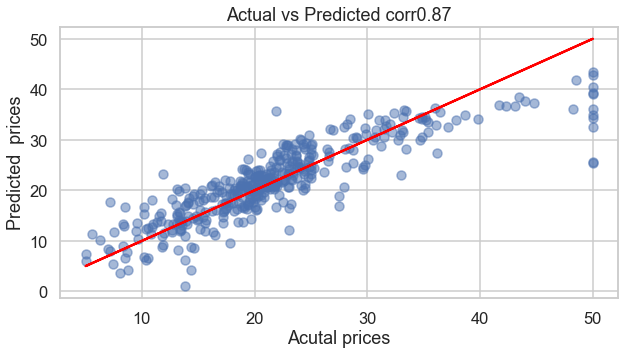

In [279]:
plt.figure(figsize=[10,5])
corr=round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train,y=results.fittedvalues,alpha=0.5)
plt.plot(y_train,y_train, color="red")
plt.xlabel("Acutal prices")
plt.ylabel("Predicted  prices")
plt.title(f"Actual vs Predicted corr{corr}")
plt.show()

# Mean Squared Error

fullnormal_log_mse=round(results.mse_resid,3)
fullnormal_log_rsquared=round(results.rsquared,3)

Text(0.5, 1.0, 'Predicted Values vs Error')

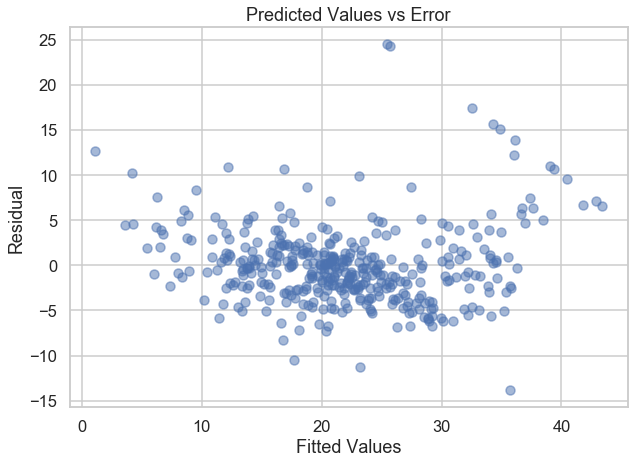

In [280]:
plt.figure(figsize=[10,7])
corr=round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=results.fittedvalues,y=results.resid,alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Predicted Values vs Error")

Text(0.5, 1.0, 'Mean is 0.0 and skew is 1.459')

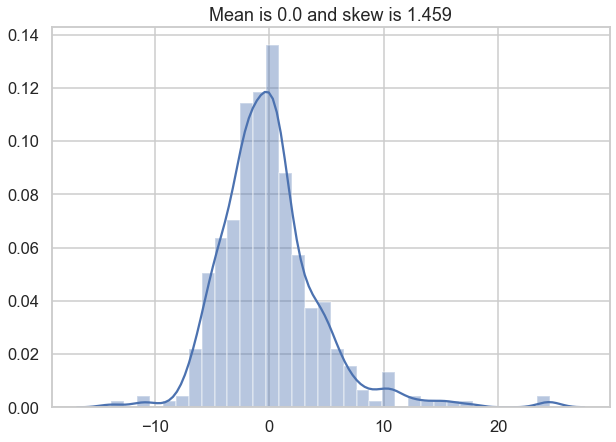

In [281]:
# Checking Normality
mean=round(results.resid.mean(),3)
skew=round(results.resid.skew(),3)
plt.figure(figsize=[10,7])
sns.distplot(results.resid)
plt.title(f"Mean is {mean} and skew is {skew}")

In [282]:
pd.DataFrame({'MSE':[reduce_log_mse,fullnormal_log_mse],
              'R-Squared':[reduce_log_rsquared,fullnormal_log_rsquared],
             'RMSE':np.sqrt([reduce_log_mse,fullnormal_log_mse])},
             index=["Reduced Log Model","Omitted Var Model"])

,MSE,R-Squared,RMSE
Reduced Log Model,0.035,0.792,0.187083
Omitted Var Model,19.921,0.750,4.463295


In [286]:
#mean=results.fittedvalues.mean()
mean=np.log(30)
std=np.sqrt(reduce_log_mse)
upper_bound=mean+2*std
lower_bound=mean-2*std
print(f" Redcued Upper bound {upper_bound} and lower bound {lower_bound}")

print(f" Full Normal Upper bound {np.e**upper_bound*1000} and lower bound {np.e**lower_bound * 1000}")

 Redcued Upper bound 3.7753631203395495 and lower bound 3.0270316429847615
 Full Normal Upper bound 43613.34233239937 and lower bound 20635.886906824155
